In [1]:
# numpy and pandas for data manipulation
import sys
import os
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import networkx as nx

import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
import cPickle as pickle

warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
%matplotlib inline

ROOT = '/Users/bede01/Documents/work/phd-papers/ml-workload-optimization/'
ROOT_PACKAGE_DIRECTORY = '/Users/bede01/Documents/work/phd-papers/ml-workload-optimization/code/collaborative-optimizer'
root_data = ROOT + '/data'

sys.path.append(ROOT_PACKAGE_DIRECTORY)
from experiment_graph.execution_environment import ExecutionEnvironment
from experiment_graph.executor import CollaborativeExecutor
from experiment_graph.workload import Workload


DATABASE_PATH = root_data + '/experiment_graphs/home-credit-default-risk/materialized-no-groupby'
N_ESTIMATOR = 100
from experiment_graph.optimizations.Reuse import HelixReuse
from experiment_graph.optimizations.Reuse import LinearTimeReuse
reuse_type=HelixReuse.NAME

def plot_graph(graph, figsize=(20,10),prog='dot', vertex_labels=True, edge_labels = True):
    from networkx.drawing.nx_agraph import graphviz_layout
    f = plt.figure(figsize=figsize)
    ax = f.add_subplot(1, 1, 1)
    pos = graphviz_layout(graph, prog=prog, args='')
    #pos = nx.drawing.layout.spring_layout(graph)
    jet = plt.get_cmap('gist_rainbow')
    nx.draw_networkx(
        graph,
        cmap=jet,
        # vmin=0,
        # vmax=len(unique_types),
        node_shape='s',
        pos=pos,
        with_labels=False,
        ax=ax)
    if vertex_labels:
        labels = {n_id:'{},{}'.format(n_id[:10],node.values()) for n_id, node in graph.nodes(data=True)}
        nx.draw_networkx_labels(graph,pos=pos,labels=labels)
    if edge_labels:
        nx.draw_networkx_edge_labels(
            graph,
            pos=pos,
            edge_labels={(u, v): d for u, v, d in graph.edges(data=True)})

['kaggle_home_credit', '.DS_Store', 'optimized_app_train.csv', 'baseline_app_train.csv', 'profiles', 'openml', 'experiment_graphs']
creating a new root node
executing 1 steps to compute vertex 4A3F3862EC3739B17293F6C0469C4825
('Training data shape: ', (246008, 122))
executing 1 steps to compute vertex 51706642912947F8FE42884FC3D178EC
creating a new root node
executing 1 steps to compute vertex 86CFD76958926538A85C44814257E4D9
('Testing data shape: ', (61503, 121))
executing 1 steps to compute vertex AF81475B28FC81FF5FDA3450B04F83B8
creating a new root node
executing 2 steps to compute vertex 5F1A78DEF5005C37A39167096883035E
finished execution in 8.332056 seconds
running again
['kaggle_home_credit', '.DS_Store', 'optimized_app_train.csv', 'baseline_app_train.csv', 'profiles', 'openml', 'experiment_graphs']
['4A3F3862EC3739B17293F6C0469C4825', 'application_train.csv{}']
remote node [4A3F3862EC3739B17293F6C0469C4825]:{'mat': True, 'recreation_cost': 0.05, 'meta_freq': 1, 'n_potential': 0,

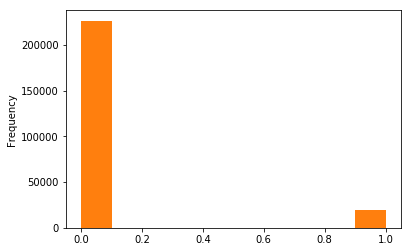

In [2]:
#!/usr/bin/env python

"""Optimized workload 1

This script is the optimized version of the workload 'start_here_a_gentle_introduction'
which utilizes our Experiment Graph for optimizing the workload
"""
import os
import warnings
# matplotlib and seaborn for plotting
from datetime import datetime

import matplotlib

from experiment_graph.workload import Workload

matplotlib.use('ps')

import matplotlib.pyplot as plt
import numpy as np
# numpy and pandas for data manipulation
import pandas as pd

# Experiment Graph

# Suppress warnings
warnings.filterwarnings('ignore')


class start_here_a_gentle_introduction(Workload):

    def run(self, execution_environment, root_data, verbose=0):
        print(os.listdir(root_data))
        app_train = execution_environment.load(root_data + '/kaggle_home_credit/application_train.csv')
        print('Training data shape: ', app_train.shape().data(verbose))
        app_train.head().data(verbose)

        app_test = execution_environment.load(root_data + '/kaggle_home_credit/application_test.csv')
        print('Testing data shape: ', app_test.shape().data(verbose))
        app_test.head().data(verbose)

        test_labels = execution_environment.load(root_data + '/kaggle_home_credit/application_test_labels.csv')

        app_train['TARGET'].value_counts().data(verbose)

        app_train['TARGET'].data(verbose).astype(int).plot.hist()

#         # Function to calculate missing values by column# Funct
#         def missing_values_table(dataset):
#             # Total missing values
#             mis_val = dataset.isnull().sum().data(verbose)

#             mis_val_percent = 100 * mis_val / len(dataset.data(verbose))

#             # Make a table with the results
#             mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
#             # Rename the columns
#             mis_val_table_ren_columns = mis_val_table.rename(columns={
#                 0: 'Missing Values',
#                 1: '% of Total Values'
#             })
#             # Sort the table by percentage of missing descending
#             mis_val_table_ren_columns = mis_val_table_ren_columns[
#                 mis_val_table_ren_columns.iloc[:, 1] != 0].sort_values(
#                 '% of Total Values', ascending=False).round(1)

#             # Print some summary information
#             print("Your selected dataframe has " + str(dataset.shape().data(verbose)[1]) + " columns.\n"
#                                                                                            "There are " + str(
#                 mis_val_table_ren_columns.shape[0]) +
#                   " columns that have missing values.")

#             # Return the dataframe with missing information
#             return mis_val_table_ren_columns

#         missing_values = missing_values_table(app_train)
#         missing_values.head(20)

#         app_train.dtypes().data(verbose).value_counts()

#         app_train.select_dtypes('object').nunique().data(verbose)

#         from experiment_graph.sklearn_helper.preprocessing import LabelEncoder
#         # Create a label encoder object
#         le_count = 0

#         columns = app_train.select_dtypes('object').data(verbose).columns
#         for col in columns:
#             # we are not using nunique because it discard nan
#             if app_train[col].nunique(dropna=False).data(verbose) <= 2:
#                 le = LabelEncoder()
#                 le.fit(app_train[col])

#                 app_train = app_train.replace_columns(col, le.transform(app_train[col]))
#                 app_test = app_test.replace_columns(col, le.transform(app_test[col]))

#                 # Keep track of how many columns were label encoded
#                 le_count += 1
#         print('%d columns were label encoded.' % le_count)
#         app_train.data(verbose)
#         app_test.data(verbose)

#         app_train = app_train.onehot_encode()
#         app_test = app_test.onehot_encode()

#         print('Training Features shape: ', app_train.shape().data(verbose))
#         print('Testing Features shape: ', app_test.shape().data(verbose))

#         train_labels = app_train['TARGET']
#         train_columns = app_train.data(verbose).columns
#         test_columns = app_test.data(verbose).columns
#         for c in train_columns:
#             if c not in test_columns:
#                 app_train = app_train.drop(c)

#         app_train = app_train.add_columns('TARGET', train_labels)

#         print('Training Features shape: ', app_train.shape().data(verbose))
#         print('Testing Features shape: ', app_test.shape().data(verbose))

#         (app_train['DAYS_BIRTH'] / 365).describe().data(verbose)

#         app_train['DAYS_EMPLOYED'].describe().data(verbose)

#         app_train['DAYS_EMPLOYED'].data(verbose).plot.hist(title='Days Employment Histogram')
#         plt.xlabel('Days Employment')

#         anom = app_train[app_train['DAYS_EMPLOYED'] == 365243]
#         non_anom = app_train[app_train['DAYS_EMPLOYED'] != 365243]
#         print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean().data(verbose)))
#         print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean().data(verbose)))
#         print('There are %d anomalous days of employment' % anom.shape().data(verbose)[0])

#         days_employed_anom = app_train["DAYS_EMPLOYED"] == 365243
#         app_train = app_train.add_columns('DAYS_EMPLOYED_ANOM', days_employed_anom)
#         temp = app_train['DAYS_EMPLOYED'].replace({365243: np.nan})
#         app_train = app_train.drop('DAYS_EMPLOYED')
#         app_train = app_train.add_columns('DAYS_EMPLOYED', temp)

#         app_train["DAYS_EMPLOYED"].data(verbose).plot.hist(title='Days Employment Histogram');
#         plt.xlabel('Days Employment')

#         days_employed_anom = app_test["DAYS_EMPLOYED"] == 365243
#         app_test = app_test.add_columns('DAYS_EMPLOYED_ANOM', days_employed_anom)
#         temp = app_test['DAYS_EMPLOYED'].replace({365243: np.nan})
#         app_test = app_test.drop('DAYS_EMPLOYED')
#         app_test = app_test.add_columns('DAYS_EMPLOYED', temp)
#         print('There are %d anomalies in the test data out of %d entries'
#               % (app_test['DAYS_EMPLOYED_ANOM'].sum().data(verbose),
#                  app_test.shape().data(verbose)[0]))

#         correlations = app_train.corr().data(verbose)
#         top = correlations['TARGET'].sort_values()
#         # Display correlations
#         print('Most Positive Correlations:\n', top.tail(15))
#         print('\nMost Negative Correlations:\n', top.head(15))

#         abs_age = app_train['DAYS_BIRTH'].abs()
#         app_train = app_train.drop('DAYS_BIRTH')
#         app_train = app_train.add_columns('DAYS_BIRTH', abs_age)
#         app_train['DAYS_BIRTH'].corr(app_train['TARGET']).data(verbose)

        return True


if __name__ == "__main__":
    ROOT = '/Users/bede01/Documents/work/phd-papers/ml-workload-optimization'
    ROOT_PACKAGE = '/Users/bede01/Documents/work/phd-papers/ml-workload-optimization/code/collaborative-optimizer'

    import sys

    sys.path.append(ROOT_PACKAGE)
    from experiment_graph.data_storage import DedupedStorageManager
    from experiment_graph.executor import CollaborativeExecutor, HelixExecutor
    from experiment_graph.execution_environment import ExecutionEnvironment
    from experiment_graph.optimizations.Reuse import LinearTimeReuse
    from experiment_graph.materialization_algorithms.materialization_methods import AllMaterializer, HelixMaterializer

    workload = start_here_a_gentle_introduction()

    mat_budget = 0.001 * 1024.0 * 1024.0
    sa_materializer = HelixMaterializer(storage_budget=mat_budget)

    # ee = ExecutionEnvironment(DedupedStorageManager(), reuse_type=LinearTimeReuse.NAME)

    root_data = ROOT + '/data'
    # database_path = \
    #     root_data + '/experiment_graphs/kaggle_home_credit/start_here_a_gentle_introduction/all_mat'
    # if os.path.exists(database_path):
    #     ee.load_history_from_disk(database_path)

    executor = HelixExecutor(budget=mat_budget)
    execution_start = datetime.now()

    executor.end_to_end_run(workload=workload, root_data=root_data, verbose=1)
    # executor.store_experiment_graph(database_path)
    execution_end = datetime.now()
    elapsed = (execution_end - execution_start).total_seconds()

    print('finished execution in {} seconds'.format(elapsed))
    print('running again')
    executor.end_to_end_run(workload=workload, root_data=root_data, verbose=1)


In [3]:
workload = executor.execution_environment.workload_dag
experiment_graph = executor.execution_environment.experiment_graph.graph
vertex = '885517FA12002C9EFFCF2618E23CEB6C'
vertex

'885517FA12002C9EFFCF2618E23CEB6C'

In [4]:
# executor.execution_environment.experiment_graph.plot_graph(plt, figsize=(20,50), labels_for_vertex=['id'])

In [5]:
workload_subgraph = workload.compute_execution_subgraph(vertex)
unified_problem = HelixReuse().unify_graph(workload_subgraph, experiment_graph, vertex)
plot_graph(graph=unified_problem, prog='dot')
unified_problem.nodes(data=True)

KeyError: '885517FA12002C9EFFCF2618E23CEB6C'

In [ ]:
psp_graph = HelixReuse().workload_graph_to_psp(unified_problem)
plot_graph(figsize=(50,10), graph=psp_graph, prog='dot')